#### Задание (2/2)
- [ ] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки 

#### Вопросы (7/7)
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
- [x] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
- [x] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
- [x] Какой процент среднего дохода россиянина будет составлять подписка Netflix?
- [x] На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
- [x] В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

#### Ограничения (5/5)
- [x] Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- [x] Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- [x] Должны присутствовать методы df.apply, pd.merge, pd.concat
- [x] В приведенной статье есть готовые выводы, их нельзя использовать.
- [x] Решение оформить в виде репозитория на github.com







In [1]:
import pandas as pd

In [38]:
netflix = pd.read_csv('https://docs.google.com/spreadsheets/d/19VR2VnIj9Sz0VFknB3yAZsf9333PbtlrasQV9TK5qtc'
                     + '/export?gid=0&format=csv')
netflix.head()

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [85]:
countries_info = pd.read_csv('https://docs.google.com/spreadsheets/d/1PLAdbkjGV6F9KWGEFz0JHBtKvZP8Y-IRnDz9ksiEpus'
                            + '/export?gid=0&format=csv')
countries_info.head()

,country,gdp_per_cap,mean_income,continent,currency
0,Argentina,22141.0,6935.0,South America,ARS
1,Australia,54891.0,21329.0,Australia,AUD
2,Austria,57891.0,20718.0,Eurasia,EUR
3,Belgium,53973.0,17917.0,Eurasia,EUR
4,Bolivia,8832.0,4787.0,South America,BOB


In [86]:
df = pd.merge(netflix, countries_info)
df.head()

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium,gdp_per_cap,mean_income,continent,currency
0,Argentina,4760,3154,1606,3.74,6.30,9.26,22141.0,6935.0,South America,ARS
1,Austria,5640,3779,1861,9.03,14.67,20.32,57891.0,20718.0,Eurasia,EUR
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,8832.0,4787.0,South America,BOB
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,25471.0,7474.0,Eurasia,BGN
4,Chile,4994,3156,1838,7.07,9.91,12.74,24928.0,9304.0,South America,CLP


In [47]:
df.dtypes

country                     object
total_lib_size               int64
no_of_shows                  int64
no_of_movies                 int64
cost_per_month_basic       float64
cost_per_month_standard    float64
cost_per_month_premium     float64
gdp_per_cap                float64
mean_income                float64
continent                   object
currency                    object
dtype: object

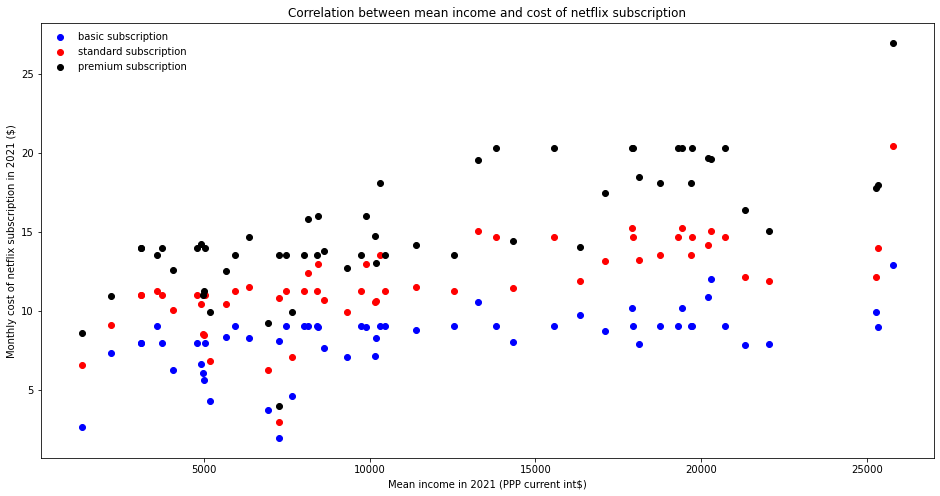

In [56]:
#2.График корреляции между средним доходом (PPP) и ценой подписки
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(16, 8))

pyplot.scatter(df.mean_income, df.cost_per_month_basic, color='blue', label='basic subscription')
pyplot.scatter(df.mean_income, df.cost_per_month_standard, color='red', label = 'standard subscription')
pyplot.scatter(df.mean_income, df.cost_per_month_premium, color='black', label = 'premium subscription')

pyplot.title('Correlation between mean income and cost of netflix subscription')
pyplot.xlabel('Mean income in 2021 (PPP current int$)')
pyplot.ylabel('Monthly cost of netflix subscription in 2021 ($)')
pyplot.legend(loc='best', frameon=False)
pyplot.show()

In [81]:
#3.1 Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны?
basic = pd.Series(df.groupby('currency').cost_per_month_basic.mean())
standard = pd.Series(df.groupby('currency').cost_per_month_standard.mean())
premium = pd.Series(df.groupby('currency').cost_per_month_premium.mean())
ds31 = pd.concat([basic, standard, premium], axis=1)
ds31

,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium
currency,,,
ARS,3.740000,6.300000,9.260000
AUD,7.840000,12.120000,16.390000
BGN,9.030000,11.290000,13.540000
BOB,7.990000,10.990000,13.990000
BRL,4.610000,7.110000,9.960000
CAD,7.910000,11.870000,15.030000
CHF,12.880000,20.460000,26.960000
CLP,7.070000,9.910000,12.740000
COP,4.310000,6.860000,9.930000


In [88]:
#3.2 Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента?
basic = pd.Series(df.groupby('continent').cost_per_month_basic.mean())
standard = pd.Series(df.groupby('continent').cost_per_month_standard.mean())
premium = pd.Series(df.groupby('continent').cost_per_month_premium.mean())
ds32 = pd.concat([basic, standard, premium], axis=1)
ds32

,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium
continent,,,
Africa,6.260000,10.050000,12.580000
Australia,8.320000,12.325000,16.665000
Eurasia,8.814565,12.547826,16.351087
North America,8.081667,11.876667,15.205000
South America,6.709000,9.619000,12.555000


In [156]:
#3.3 Сколько стоит (годовая) подписка относительно среднего (годового) дохода (базовая, стандартная, премиум) в Чехии?
row = df[df['country']=='Czechia']
df33 = pd.DataFrame({'Cost of subscriptions relative to mean income in Czechia': 
                     [(row.cost_per_month_basic *12 / row.mean_income).to_string()[5:],
                      (row.cost_per_month_standard *12 / row.mean_income).to_string()[5:],
                      (row.cost_per_month_premium *12 / row.mean_income).to_string()[5:]]},
                    index=['Basic', 'Standard', 'Premium'])
df33

,Cost of subscriptions relative to mean income in Czechia
Basic,0.0093
Standard,0.012101
Premium,0.014903


In [126]:
#3.4 Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
df.nlargest(5, 'no_of_shows')

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium,gdp_per_cap,mean_income,continent,currency
8,Czechia,7325,5234,2091,8.83,11.49,14.15,42956.0,11394.0,Eurasia,CZK
36,Slovakia,7035,5055,1980,9.03,11.29,13.54,34815.0,8408.0,Eurasia,EUR
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,25471.0,7474.0,Eurasia,BGN
50,Hungary,6884,4802,2082,7.64,10.71,13.78,35088.0,8613.0,Eurasia,HUF
57,United Kingdom,6643,4551,2092,7.91,13.20,18.48,47089.0,18133.0,Eurasia,GBP


In [157]:
#3.5 Какой процент среднего (годового) дохода россиянина будет составлять (годовая) подписка Netflix?
row = df[df['country']=='Russia']
df35 = pd.DataFrame({'Percentage of yearly income that russians pay for the Netflix subscription': 
                     [(row.cost_per_month_basic *12 / row.mean_income * 100).to_string()[5:] + '%',
                      (row.cost_per_month_standard *12 / row.mean_income * 100).to_string()[5:] + '%',
                      (row.cost_per_month_premium *12 / row.mean_income * 100).to_string()[5:]+ '%']},
                    index=['Basic', 'Standard', 'Premium'])
df35

,Percentage of yearly income that russians pay for the Netflix subscription
Basic,1.341031%
Standard,1.788041%
Premium,2.236701%


In [147]:
#3.6 На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)?
def calc_basic_subscription_efficiency(row):
    return row.cost_per_month_basic / row.total_lib_size

df36 = df
df36['basic_subscription_efficiency'] = df36.apply(calc_basic_subscription_efficiency, axis='columns')
df36 = df36.sort_values(by=['basic_subscription_efficiency'], ascending=False, ignore_index=True)
df36[df36['country']=='Russia']
# Россия на 40 месте по эффективности базовой подписки

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium,gdp_per_cap,mean_income,continent,currency,basic_subscription_efficiency
39,Russia,5711,3624,2087,8.13,10.84,13.56,29485.0,7275.0,Eurasia,RUB,0.001424


In [148]:
#3.6 На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)?
def calc_standard_subscription_efficiency(row):
    return row.cost_per_month_standard / row.total_lib_size

df36 = df
df36['standard_subscription_efficiency'] = df36.apply(calc_standard_subscription_efficiency, axis='columns')
df36 = df36.sort_values(by=['standard_subscription_efficiency'], ascending=False, ignore_index=True)
df36[df36['country']=='Russia']
# Россия на 48 месте по эффективности стандартной подписки

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium,gdp_per_cap,mean_income,continent,currency,basic_subscription_efficiency,standard_subscription_efficiency
47,Russia,5711,3624,2087,8.13,10.84,13.56,29485.0,7275.0,Eurasia,RUB,0.001424,0.001898


In [149]:
#3.6 На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)?
def calc_premium_subscription_efficiency(row):
    return row.cost_per_month_premium / row.total_lib_size

df36 = df
df36['premium_subscription_efficiency'] = df36.apply(calc_premium_subscription_efficiency, axis='columns')
df36 = df36.sort_values(by=['premium_subscription_efficiency'], ascending=False, ignore_index=True)
df36[df36['country']=='Russia']
# Россия на 48 месте по эффективности премиальной подписки

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium,gdp_per_cap,mean_income,continent,currency,basic_subscription_efficiency,standard_subscription_efficiency,premium_subscription_efficiency
47,Russia,5711,3624,2087,8.13,10.84,13.56,29485.0,7275.0,Eurasia,RUB,0.001424,0.001898,0.002374


In [153]:
#3.7 В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?
df.sort_values(by=['cost_per_month_basic']).head(1)

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium,gdp_per_cap,mean_income,continent,currency,basic_subscription_efficiency,standard_subscription_efficiency,premium_subscription_efficiency
41,Turkey,4639,2930,1709,1.97,3.0,4.02,32278.0,7267.0,Eurasia,TRY,0.000425,0.000647,0.000867


In [154]:
df.sort_values(by=['cost_per_month_standard']).head(1)

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium,gdp_per_cap,mean_income,continent,currency,basic_subscription_efficiency,standard_subscription_efficiency,premium_subscription_efficiency
41,Turkey,4639,2930,1709,1.97,3.0,4.02,32278.0,7267.0,Eurasia,TRY,0.000425,0.000647,0.000867


In [155]:
df.sort_values(by=['cost_per_month_premium']).head(1)

,country,total_lib_size,no_of_shows,no_of_movies,cost_per_month_basic,cost_per_month_standard,cost_per_month_premium,gdp_per_cap,mean_income,continent,currency,basic_subscription_efficiency,standard_subscription_efficiency,premium_subscription_efficiency
41,Turkey,4639,2930,1709,1.97,3.0,4.02,32278.0,7267.0,Eurasia,TRY,0.000425,0.000647,0.000867
